In [1]:
import pandas as pd
import numpy as np

# Load dataset

In [2]:
# Column names
columns = [
    "American Express Company",
    "Bank of America Corporation",
    "BP plc",
    "Broadcom Corp.",
    "Costco Wholesale Corporation",
    "Cisco Systems, Inc.",
    "The Walt Disney Company",
    "The Goldman Sachs Group, Inc.",
    "Hewlett-Packard Company",
    "Intel Corporation",
    "The Coca-Cola Company",
    "3M Company",
    "Microsoft Corporation",
    "Nike, Inc.",
    "QUALCOMM Incorporated",
    "Starbucks Corporation",
    "AT&T, Inc.",
    "Tiffany & Co.",
    "Verizon Communications Inc.",
    "US Dollar"
]

# Read data into DataFrame
df = pd.read_table('portfolio_data.txt', sep='\s+', header=None, names=columns,skiprows=22)



In [3]:
df.head()

,American Express Company,Bank of America Corporation,BP plc,Broadcom Corp.,Costco Wholesale Corporation,"Cisco Systems, Inc.",The Walt Disney Company,"The Goldman Sachs Group, Inc.",Hewlett-Packard Company,Intel Corporation,The Coca-Cola Company,3M Company,Microsoft Corporation,"Nike, Inc.",QUALCOMM Incorporated,Starbucks Corporation,"AT&T, Inc.",Tiffany & Co.,Verizon Communications Inc.,US Dollar
0,35.79,30.11,31.59,21.73,30.18,22.30,20.40,86.77,20.05,24.40,18.75,64.28,20.10,14.84,23.11,15.44,14.94,37.08,18.78,1.00000
1,36.10,30.20,31.91,22.56,30.04,22.78,20.80,86.81,20.49,24.97,18.77,65.50,20.60,14.83,23.60,15.67,15.46,36.87,19.32,1.00004
2,36.16,30.15,32.11,22.31,30.38,23.04,20.85,86.30,20.58,24.96,18.69,65.30,20.67,14.81,23.37,15.86,15.50,37.17,19.64,1.00008
3,36.27,30.08,31.35,22.33,30.82,23.50,21.20,88.11,20.22,25.79,18.57,64.18,20.65,14.86,24.03,15.80,15.66,36.66,19.68,1.00012
4,36.16,30.09,31.38,22.77,30.96,24.22,21.51,88.22,21.37,25.98,18.66,63.75,20.62,15.01,25.41,15.66,15.95,35.76,19.98,1.00016


In [4]:
# Create the dataframe with the percentage difference per day
df_ret=df.pct_change()

# Delete the first row
df_ret = df_ret.iloc[1:]
# Reset the index
df_ret.reset_index(drop=True, inplace=True)

df_ret.head()

,American Express Company,Bank of America Corporation,BP plc,Broadcom Corp.,Costco Wholesale Corporation,"Cisco Systems, Inc.",The Walt Disney Company,"The Goldman Sachs Group, Inc.",Hewlett-Packard Company,Intel Corporation,The Coca-Cola Company,3M Company,Microsoft Corporation,"Nike, Inc.",QUALCOMM Incorporated,Starbucks Corporation,"AT&T, Inc.",Tiffany & Co.,Verizon Communications Inc.,US Dollar
0,0.008662,0.002989,0.010130,0.038196,-0.004639,0.021525,0.019608,0.000461,0.021945,0.023361,0.001067,0.018979,0.024876,-0.000674,0.021203,0.014896,0.034806,-0.005663,0.028754,0.00004
1,0.001662,-0.001656,0.006268,-0.011082,0.011318,0.011414,0.002404,-0.005875,0.004392,-0.000400,-0.004262,-0.003053,0.003398,-0.001349,-0.009746,0.012125,0.002587,0.008137,0.016563,0.00004
2,0.003042,-0.002322,-0.023669,0.000896,0.014483,0.019965,0.016787,0.020973,-0.017493,0.033253,-0.006421,-0.017152,-0.000968,0.003376,0.028241,-0.003783,0.010323,-0.013721,0.002037,0.00004
3,-0.003033,0.000332,0.000957,0.019704,0.004543,0.030638,0.014623,0.001248,0.056874,0.007367,0.004847,-0.006700,-0.001453,0.010094,0.057428,-0.008861,0.018519,-0.024550,0.015244,0.00004
4,-0.007467,-0.008641,0.000319,0.019763,0.019057,0.005367,-0.003719,-0.012696,-0.021058,-0.008083,-0.010718,-0.003451,-0.017944,-0.007328,0.000000,-0.008301,-0.050784,-0.001119,-0.029029,0.00004


In [5]:
df_train = df_ret.iloc[:2000,:-1] #define the train set
df_train_rf = df_ret.iloc[:2000,-1] #define the train set risk free
df_train_rf=df_train_rf.values.reshape(-1, 1)

df_test = df_ret.iloc[-500:,:-1] #define the test set
df_test_rf = df_ret.iloc[-500:,-1] #define the test set risk free
df_test_rf=df_test_rf.values.reshape(-1, 1)

In [6]:
# Initial state of train set
df_train.iloc[0]

American Express Company         0.008662
Bank of America Corporation      0.002989
BP plc                           0.010130
Broadcom Corp.                   0.038196
Costco Wholesale Corporation    -0.004639
Cisco Systems, Inc.              0.021525
The Walt Disney Company          0.019608
The Goldman Sachs Group, Inc.    0.000461
Hewlett-Packard Company          0.021945
Intel Corporation                0.023361
The Coca-Cola Company            0.001067
3M Company                       0.018979
Microsoft Corporation            0.024876
Nike, Inc.                      -0.000674
QUALCOMM Incorporated            0.021203
Starbucks Corporation            0.014896
AT&T, Inc.                       0.034806
Tiffany & Co.                   -0.005663
Verizon Communications Inc.      0.028754
Name: 0, dtype: float64

# Solve the Optimization Problem

Solve the linearly least square least squares problem

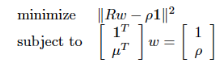

With Solution:

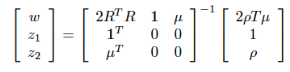

In [7]:
In_Inv = 10000  # Initial Investment
p_returns = [((0.1)/250), ((0.2)/250), ((0.4)/250)] #daily returns
p_returns_list_names =['10%','20%','40%','1/n','Risk-free']

## Training Dataset

In [8]:
# Claculate the tables that will be used in the above equation in order to calculate the weights to achieve high return and low risk.

R_train=df_train  #Returns Array
R_train=R_train.iloc[:,:].values 

R_train_rf=df_train_rf  #Returns Array for risk free

mi_train = np.mean(R_train,axis=0)
mi_train = mi_train.reshape(-1, 1)

one_train=np.ones((R_train.shape[1],1))

In [9]:
RTR_train = 2*(R_train.T @ R_train)

RTR_train = np.concatenate((RTR_train, one_train.T), axis=0)
RTR_train = np.concatenate((RTR_train, mi_train.T), axis=0)

temp_1_train=np.concatenate((one_train, mi_train), axis=1)
temp_1_train=np.concatenate((temp_1_train, np.zeros((2,2))), axis=0)

RTR_train = np.concatenate((RTR_train, temp_1_train), axis=1)

array_1_train_inv=np.linalg.inv(RTR_train)

In [10]:
#Build the second table for the different values of p


weights_train = np.zeros((R_train.shape[1], len(p_returns))) #20x3 In every column contains the weights for each asset per particular p return


for i,p in enumerate(p_returns):
    array_2_train = 2 * p * R_train.shape[0] * mi_train
    array_2_train = np.concatenate((array_2_train, np.array([[1]])), axis=0)
    array_2_train = np.concatenate((array_2_train, np.array([[p]])), axis=0)

    weights_train[:,i] = (array_1_train_inv @ array_2_train)[:-2].flatten()  # drop the last 2 columns that refer to Lagrange multipliers


# add one more column with the uniform weights
uniform_weights = np.full((19, 1), (1/19))    
weights_train = np.hstack((weights_train, uniform_weights))   

In [11]:
# Calculate returns
train_returns=R_train@weights_train
train_returns_rf=(R_train_rf@[1]).reshape(-1,1)

train_returns=np.concatenate((train_returns,train_returns_rf),axis=1) # also add the column with the returns for risk free where the respective weights are everywhere 1

In [12]:
total_portfolios=len(p_returns_list_names)
V_train = np.array([In_Inv] * total_portfolios).reshape(1, total_portfolios)

# Compute V_t for each column
cumulative_product = np.ones(total_portfolios)

for returns in train_returns:
    cumulative_product *= (1 + returns)
    V_train = np.vstack([V_train, In_Inv * cumulative_product])

## Test Dataset

In [13]:
# Return tables for test dataset

R_test=df_test  #Returns Array
R_test=R_test.iloc[:,:].values 

R_test_rf=df_test_rf  #Returns Array for risk free

In [14]:
# Calculate returns
test_returns=R_test@weights_train
test_returns_rf=(R_test_rf@[1]).reshape(-1,1)

test_returns=np.concatenate((test_returns,test_returns_rf),axis=1) # also add the column with the returns for risk free where the respective weights are everywhere 1

In [15]:
total_portfolios=len(p_returns_list_names)
V_test = np.array([In_Inv] * total_portfolios).reshape(1, total_portfolios)

# Compute V_t for each column
cumulative_product = np.ones(total_portfolios)

for returns in test_returns:
    cumulative_product *= (1 + returns)
    V_test = np.vstack([V_test, In_Inv * cumulative_product])

# Value of the portfolio over time for the training and testing datasets

## Plots for Training set

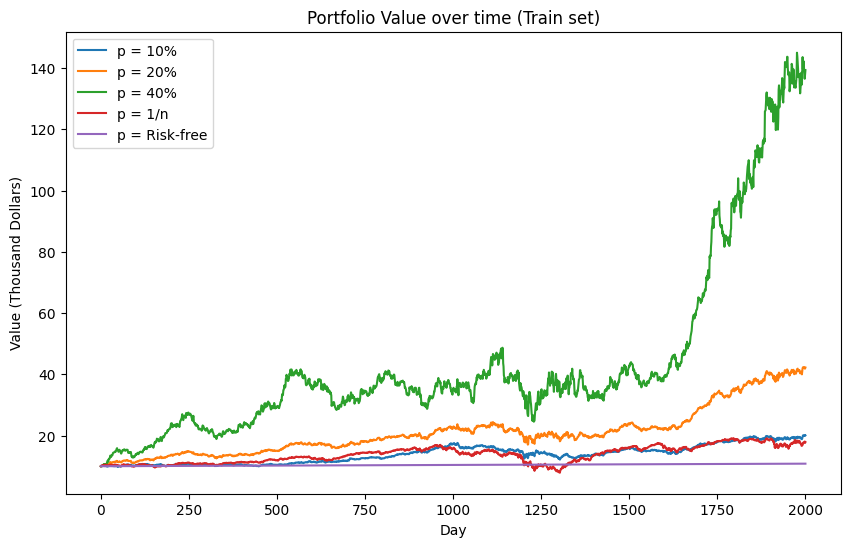

In [16]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))  

for i,p in enumerate(p_returns_list_names):
    plt.plot((V_train[:,i]/1000), label=f"p = {p}")  

plt.xlabel('Day')
plt.ylabel('Value (Thousand Dollars)')
plt.title('Portfolio Value over time (Train set)')
plt.legend()
plt.show()

## Plots for Test set

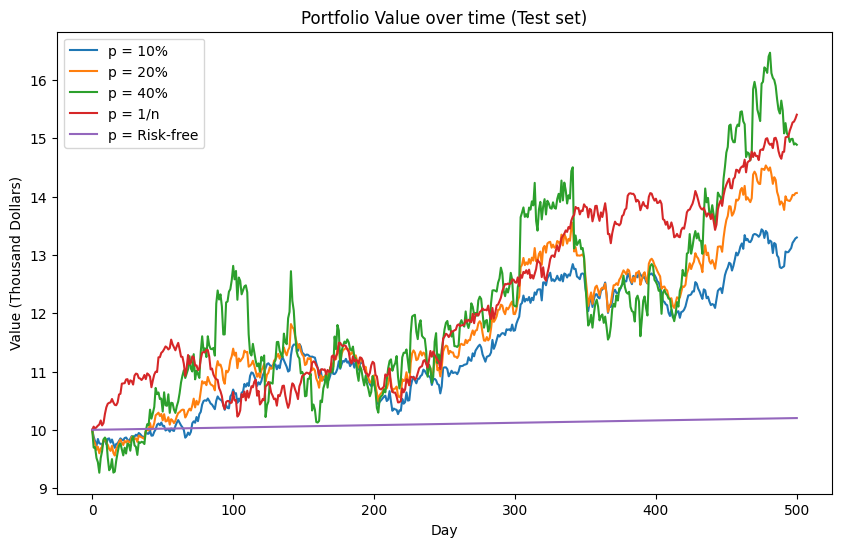

In [17]:
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))  

for i,p in enumerate(p_returns_list_names):
    plt.plot((V_test[:,i]/1000), label=f"p = {p}")  

plt.xlabel('Day')
plt.ylabel('Value (Thousand Dollars)')
plt.title('Portfolio Value over time (Test set)')
plt.legend()
plt.show()


# Annualized Return, Risk and Leverage for each portfolio

In [18]:
#Leverage: The sum of the absolute values of the weights
leverage = np.sum(np.abs(weights_train), axis=0) 
leverage=np.append(leverage, 1) # add also the wheight for risk free portflolio which is 1

In [19]:
#Portfolio annualized return: P*avg(r)
#Portfolio annualized risk: sqrt(P)*std(r)

ret_train=250*(R_train @ weights_train).mean(axis=0) #Annual return for train set (To obtain annualized return multiply the daily return by P = 250 trading days)
ret_train_rf=250*(R_train_rf @ [1]).mean(axis=0) # Insert also return for risk free
ret_train = np.append(ret_train, ret_train_rf)


ret_test=250*(R_test @ weights_train).mean(axis=0) #Annual return for test set (To obtain annualized return multiply the daily return by P = 250 trading days)
ret_test_rf=250*(R_test_rf @ [1]).mean(axis=0)# Insert also return for risk free
ret_test = np.append(ret_test, ret_test_rf)

risk_train=np.sqrt(250)*(R_train @ weights_train).std(axis=0) #Annual risk for train set
risk_train_rf=np.sqrt(250)*(R_train_rf @ [1]).std(axis=0) # Insert also risk for risk free
risk_train = np.append(risk_train, risk_train_rf)


risk_test=np.sqrt(250)*(R_test @ weights_train).std(axis=0) #Annual risk for test set
risk_test_rf=np.sqrt(250)*(R_test_rf @ [1]).std(axis=0) # Insert also risk for risk free
risk_test = np.append(risk_test, risk_test_rf)

In [20]:
ret_train_reshaped = ret_train.T.reshape((-1, 1))
ret_test_reshaped = ret_test.T.reshape((-1, 1))
risk_train_reshaped = risk_train.T.reshape((-1, 1))
risk_test_reshaped = risk_test.T.reshape((-1, 1))
leverage_reshaped = leverage.T.reshape((-1, 1))

return_risk_leverage = np.concatenate((ret_train_reshaped, ret_test_reshaped), axis=1)
return_risk_leverage = np.concatenate((return_risk_leverage, risk_train_reshaped), axis=1)
return_risk_leverage = np.concatenate((return_risk_leverage, risk_test_reshaped), axis=1)
return_risk_leverage = np.concatenate((return_risk_leverage, leverage_reshaped), axis=1)



In [21]:
return_risk_leverage_df=pd.DataFrame(return_risk_leverage,columns=[['Return_Train','Return_Test','Risk_Train','Risk_Test','Leverage']]).apply(lambda x: round(x,2))
return_risk_leverage_df.insert(0, "Portfolio", ['10%', '20%', '40%','1/n','Risk Free'], True)

In [22]:
return_risk_leverage_df

,Portfolio,Return_Train,Return_Test,Risk_Train,Risk_Test,Leverage
0,10%,0.10,0.15,0.16,0.12,1.66
1,20%,0.20,0.18,0.20,0.15,2.40
2,40%,0.40,0.25,0.38,0.31,5.40
3,1/n,0.10,0.22,0.24,0.13,1.00
4,Risk Free,0.01,0.01,0.00,0.00,1.00
